In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
print(device)

cuda:0


In [4]:
# Data
print('==> Preparing data..')
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.55, 0.5), (0.5, 0.5, 0.5)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

==> Preparing data..


In [5]:
################################`sets are PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1].
# .. note::
#     If running on Windows and you get a BrokenPipeError, try setting
#     the num_worker of torch.utils.data.DataLoader() to 0.

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)

trainset1 = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainset = trainset + trainset1

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

########################################################################
# Let us show some of the training images, for fun.

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [6]:
# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


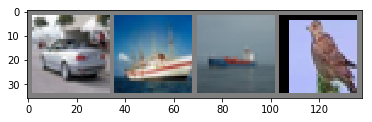

  car  ship  ship  bird


In [7]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [8]:
########################################################################
# 2. Define a Convolutional Neural Network
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# Copy the neural network from the Neural Networks section before and modify it to
# take 3-channel images (instead of 1-channel images as it was defined).




class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.dropout1 = nn.Dropout(p=0.15, inplace=False)
        self.conv2 = nn.Conv2d(6, 10, 5)
        #self.dropout2 = nn.Dropout(p=0.25, inplace=False)
        self.conv3 = nn.Conv2d(10, 16, 5)
        self.dropout3 = nn.Dropout(p=0.25, inplace=False)
        self.fc1 = nn.Linear(16 * 20 * 20, 450)
        self.dropout4 = nn.Dropout(p=0.25, inplace=False)
        self.fc2 = nn.Linear(450, 150)
        self.dropout5 = nn.Dropout(p=0.15, inplace=False)
        self.fc3 = nn.Linear(150, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.dropout1(x)
        x = F.relu(self.conv2(x))
        #x = self.dropout2(x)
        x = F.relu(self.conv3(x))
        x = self.dropout3(x)
        x = x.view(-1, 16 * 20 * 20)
        x = F.relu(self.fc1(x))
        x = self.dropout4(x)
        x = F.relu(self.fc2(x))
        x = self.dropout5(x)
        x = self.fc3(x)
        return x


net = Net()
net.to(torch.device("cuda:0"))

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (dropout1): Dropout(p=0.15, inplace=False)
  (conv2): Conv2d(6, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(10, 16, kernel_size=(5, 5), stride=(1, 1))
  (dropout3): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=6400, out_features=450, bias=True)
  (dropout4): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=450, out_features=150, bias=True)
  (dropout5): Dropout(p=0.15, inplace=False)
  (fc3): Linear(in_features=150, out_features=10, bias=True)
)

In [9]:
def get_n_params(model):
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp += nn
    return pp

In [10]:
########################################################################
# 3. Define a Loss function and optimizer
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# Let's use a Classification Cross-Entropy loss and SGD with momentum.

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)

In [11]:
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (dropout1): Dropout(p=0.15, inplace=False)
  (conv2): Conv2d(6, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(10, 16, kernel_size=(5, 5), stride=(1, 1))
  (dropout3): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=6400, out_features=450, bias=True)
  (dropout4): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=450, out_features=150, bias=True)
  (dropout5): Dropout(p=0.15, inplace=False)
  (fc3): Linear(in_features=150, out_features=10, bias=True)
)


In [12]:
param1 = get_n_params(net)
print(param1)

2955592


In [13]:
########################################################################
# 4. Train the network
# ^^^^^^^^^^^^^^^^^^^^
#
# This is when things start to get interesting.
# We simply have to loop over our data iterator, and feed the inputs to the
# network and optimize.
lossy_loss = []
for epoch in range(100):  # loop over the dataset multiple times
    loss_values = []
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda() # add this line

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            loss_values.append(running_loss / 2000)
            running_loss = 0.0
    
    lossy_loss.append(np.mean(np.array(loss_values)))

print('Finished Training') 

[1,  2000] loss: 2.162
[1,  4000] loss: 1.941
[1,  6000] loss: 1.830
[1,  8000] loss: 1.758
[1, 10000] loss: 1.735
[1, 12000] loss: 1.692
[1, 14000] loss: 1.656
[1, 16000] loss: 1.629
[1, 18000] loss: 1.611
[1, 20000] loss: 1.561
[1, 22000] loss: 1.557
[1, 24000] loss: 1.560
[2,  2000] loss: 1.502
[2,  4000] loss: 1.478
[2,  6000] loss: 1.478
[2,  8000] loss: 1.450
[2, 10000] loss: 1.444
[2, 12000] loss: 1.434
[2, 14000] loss: 1.423
[2, 16000] loss: 1.394
[2, 18000] loss: 1.397
[2, 20000] loss: 1.397
[2, 22000] loss: 1.364
[2, 24000] loss: 1.387
[3,  2000] loss: 1.345
[3,  4000] loss: 1.316
[3,  6000] loss: 1.317
[3,  8000] loss: 1.305
[3, 10000] loss: 1.306
[3, 12000] loss: 1.302
[3, 14000] loss: 1.289
[3, 16000] loss: 1.306
[3, 18000] loss: 1.264
[3, 20000] loss: 1.238
[3, 22000] loss: 1.263
[3, 24000] loss: 1.260
[4,  2000] loss: 1.206
[4,  4000] loss: 1.228
[4,  6000] loss: 1.213
[4,  8000] loss: 1.217
[4, 10000] loss: 1.211
[4, 12000] loss: 1.188
[4, 14000] loss: 1.192
[4, 16000] 

[29, 22000] loss: 0.902
[29, 24000] loss: 0.876
[30,  2000] loss: 0.854
[30,  4000] loss: 0.870
[30,  6000] loss: 0.849
[30,  8000] loss: 0.859
[30, 10000] loss: 0.887
[30, 12000] loss: 0.855
[30, 14000] loss: 0.892
[30, 16000] loss: 0.879
[30, 18000] loss: 0.880
[30, 20000] loss: 0.869
[30, 22000] loss: 0.878
[30, 24000] loss: 0.900
[31,  2000] loss: 0.832
[31,  4000] loss: 0.857
[31,  6000] loss: 0.868
[31,  8000] loss: 0.865
[31, 10000] loss: 0.852
[31, 12000] loss: 0.881
[31, 14000] loss: 0.895
[31, 16000] loss: 0.872
[31, 18000] loss: 0.897
[31, 20000] loss: 0.871
[31, 22000] loss: 0.880
[31, 24000] loss: 0.908
[32,  2000] loss: 0.835
[32,  4000] loss: 0.868
[32,  6000] loss: 0.868
[32,  8000] loss: 0.853
[32, 10000] loss: 0.854
[32, 12000] loss: 0.837
[32, 14000] loss: 0.873
[32, 16000] loss: 0.870
[32, 18000] loss: 0.886
[32, 20000] loss: 0.879
[32, 22000] loss: 0.880
[32, 24000] loss: 0.887
[33,  2000] loss: 0.836
[33,  4000] loss: 0.820
[33,  6000] loss: 0.839
[33,  8000] loss

KeyboardInterrupt: 

Text(0.5, 1.0, 'Loss History vs # of Epochs')

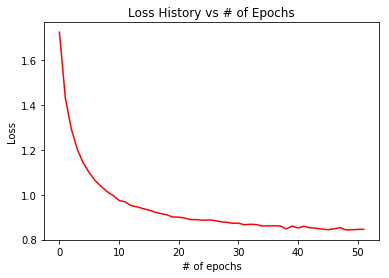

In [14]:
plt.plot(np.array(lossy_loss), 'r')
plt.xlabel('# of epochs')
plt.ylabel('Loss')
plt.title('Loss History vs # of Epochs')

In [15]:
########################################################################
# Let's quickly save our trained model:

PATH = './cifar_net_dropout_8.pth'
torch.save(net.state_dict(), PATH)

In [16]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        images, labels = images.cuda(), labels.cuda() # add this line
        net2 = net.eval()
        outputs = net2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 50000 training images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 50000 training images: 77 %


In [17]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        images, labels = images.cuda(), labels.cuda() # add this line
        outputs = net2(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 76 %
Accuracy of   car : 89 %
Accuracy of  bird : 72 %
Accuracy of   cat : 60 %
Accuracy of  deer : 73 %
Accuracy of   dog : 75 %
Accuracy of  frog : 79 %
Accuracy of horse : 82 %
Accuracy of  ship : 86 %
Accuracy of truck : 82 %


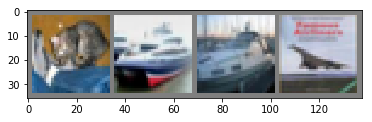

GroundTruth:    cat  ship  ship plane


In [18]:
########################################################################
# See `here <https://pytorch.org/docs/stable/notes/serialization.html>`_
# for more details on saving PyTorch models.
#
# 5. Test the network on the test data
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#
# We have trained the network for 2 passes over the training dataset.
# But we need to check if the network has learnt anything at all.
#
# We will check this by predicting the class label that the neural network
# outputs, and checking it against the ground-truth. If the prediction is
# correct, we add the sample to the list of correct predictions.
#
# Okay, first step. Let us display an image from the test set to get familiar.

dataiter = iter(testloader)
images, labels = dataiter.next()


# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [19]:
########################################################################
# Next, let's load back in our saved model (note: saving and re-loading the model
# wasn't necessary here, we only did it to illustrate how to do so):

net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [20]:
########################################################################
# Okay, now let us see what the neural network thinks these examples above are:

outputs = net(images)

In [21]:
########################################################################
# The outputs are energies for the 10 classes.
# The higher the energy for a class, the more the network
# thinks that the image is of the particular class.
# So, let's get the index of the highest energy:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship   car  ship


In [22]:

########################################################################
# The results seem pretty good.
#
# Let us look at how the network performs on the whole dataset.

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        net1 = net.eval()
        outputs = net1(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 71 %


In [23]:
########################################################################
# That looks way better than chance, which is 10% accuracy (randomly picking
# a class out of 10 classes).
# Seems like the network learnt something.
#
# Hmmm, what are the classes that performed well, and the classes that did
# not perform well:

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 72 %
Accuracy of   car : 86 %
Accuracy of  bird : 61 %
Accuracy of   cat : 48 %
Accuracy of  deer : 65 %
Accuracy of   dog : 66 %
Accuracy of  frog : 76 %
Accuracy of horse : 77 %
Accuracy of  ship : 83 %
Accuracy of truck : 77 %
